## EDA Steps

This step will mostly handling the exploring data

1. We want to know outliers
2. We want to know how the graphs looks like

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk import tokenize
from nltk.corpus import stopwords



In [97]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/beebeewijaya/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beebeewijaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
df = pd.read_csv("../../data/processed/fake-news-train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label
0,0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


Because these are text data, we want to do several approaches to understand the data

1. Counts and length
2. Frequence Word Analysis

In [99]:
df["title_length"] = df["title"].str.len()
df["text_length"] = df["text"].str.len()

df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,title_length,text_length
0,0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,75,1335
1,1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,72,373
2,2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,64,2072
3,3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,67,2692
4,4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,103,1946


In [100]:
# We want to get the word count

def word_count(t):
    t_l = t.split()
    return len(t_l)

df["title_words_count"] = df["title"].apply(word_count)
df["text_words_count"] = df["text"].apply(word_count)

df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,title_length,text_length,title_words_count,text_words_count
0,0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,75,1335,10,212
1,1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,72,373,11,59
2,2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,64,2072,10,354
3,3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,67,2692,10,428
4,4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,103,1946,14,314


In [101]:
# Now we want to get the sentences on the "Text" feature

def sentence_count(t):
  t_l = tokenize.sent_tokenize(t)
  return len(t_l)


df["text_sentence_count"] = df["text"].apply(sentence_count)

df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,title_length,text_length,title_words_count,text_words_count,text_sentence_count
0,0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,75,1335,10,212,7
1,1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,72,373,11,59,2
2,2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,64,2072,10,354,11
3,3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,67,2692,10,428,13
4,4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,103,1946,14,314,8


In [102]:
# Let's visualize the sentence, the words count and the text length.
def visualize(feature):
  plt.subplot(1,2,1)
  sns.kdeplot(data=df, x=feature, hue="label")

  plt.subplot(1,2,2)
  sns.boxplot(data=df, x=feature, hue="label")

  plt.show()

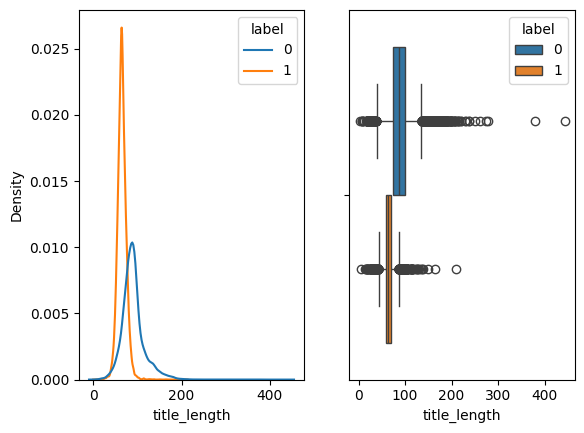

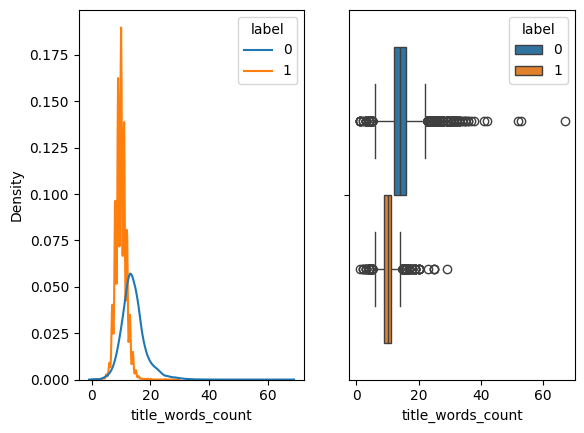

In [103]:
# title features
title_features = ["title_length", "title_words_count"]

for i in range(len(title_features)):
  visualize(title_features[i])

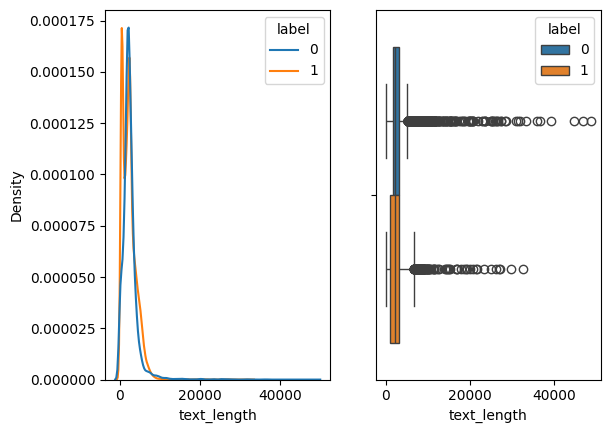

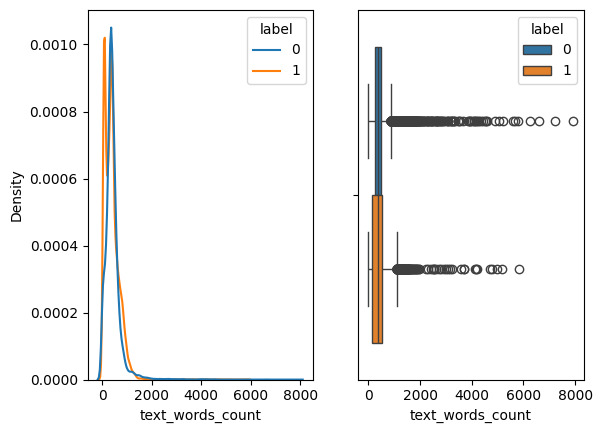

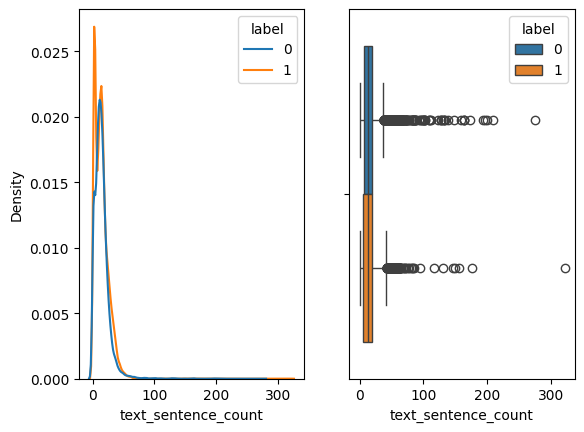

In [104]:
# text features
text_features = ["text_length", "text_words_count", "text_sentence_count"]

for i in range(len(text_features)):
  visualize(text_features[i])

### Analyzing graph above

From above we can see that the main difference between both fake and real is the "title" word count and length.
The "Text" is not having a much difference. but we will try to use the "text" features too.

We will try to create a data clean on the "text" for getting the data removing `stopwords` 

In [105]:
import re

# We will clean the data into
# 1. lowercase
# 2. remove punctuations
# 3. remove stopwords
def clean(t):
  temp_t = t.lower()
  temp_t = re.sub('[^a-z A-Z 0-9-]+', '', temp_t)
  temp_t = " ".join([word for word in temp_t.split() if word not in stopwords.words('english')])
  return temp_t

df["text_clean"] = df["text"].apply(clean)
df.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,title_length,text_length,title_words_count,text_words_count,text_sentence_count,text_clean
0,0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,75,1335,10,212,7,ramallah west bank reuters - palestinians swit...
1,1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,72,373,11,59,2,beijing reuters - us president-elect donald tr...
2,2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,64,2072,10,354,11,controversy trump personal tax returns continu...
3,3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,67,2692,10,428,13,beijing reuters - trip beijing last week zimba...
4,4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,103,1946,14,314,8,never uncourageous person white house barack o...


<!-- df.to_csv() -->

In [107]:
df.to_csv("../../data/processed/fake-news-eda.csv", index=False)